[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/diogoflim/AM/blob/main/pytorch.ipynb)


# Introdução ao Aprendizado de Máquina

**Professor: Diogo Ferreira de Lima Silva (TEP)**

**PPGEP - UFF**


## Multilayer Perceptron com Pytorch

Vamos aplicar um perceptron multi-camadas para classificação do **Iris Dataset**.

Esta aplicação pode ser encontrada em: 
- Raschka, S., Liu, Y. H., Mirjalili, V., & Dzhulgakov, D. (2022). Machine Learning with PyTorch and Scikit-Learn: Develop machine learning and deep learning models with Python. Packt Publishing Ltd.

- Veja também o código do capítulo 9: https://github.com/rasbt/machine-learning-book

Inicialmente, realizaremos o download do conjunto de dados com a biblioteca sklearn.


In [38]:
from sklearn.datasets import load_iris

In [39]:
iris = load_iris()
X = iris['data']
y = iris['target']

print(X[:10])
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Dividindo os dados em um conjunto de treinamento e teste

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=1./3, random_state=1)

In [5]:
print(X_train.shape)
print(y_train.shape)
print('-------')
print(X_test.shape)
print(y_test.shape)

(100, 4)
(100,)
-------
(50, 4)
(50,)


Agora, normalizaremos o conjunto de treinamento:

In [6]:
import numpy as np

In [7]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm

array([[ 0.8389246 , -0.02752244, -0.99590442, -1.65848156],
       [ 1.04279449,  0.02344504, -1.09783936, -1.65848156],
       [ 2.16407889,  0.17634746,  1.65440417, -0.63913211],
       [ 1.75633911, -0.18042485,  0.99182702, -0.69009958],
       [ 1.960209  , -0.2823598 ,  1.45053428, -0.843002  ],
       [ 1.50150175, -0.33332727,  1.09376197, -0.63913211],
       [ 1.3995668 , -0.33332727,  0.68602218, -0.843002  ],
       [ 1.29763186, -0.02752244,  0.53311977, -0.94493695],
       [ 2.16407889, -0.33332727,  1.65440417, -0.74106705],
       [ 1.14472944, -0.23139233,  0.38021735, -1.14880684],
       [ 0.68602218, -0.02752244, -0.94493695, -1.65848156],
       [ 1.14472944, -0.48622969,  0.78795713, -0.74106705],
       [ 1.45053428, -0.38429474,  0.73698966, -0.843002  ],
       [ 0.68602218, -0.23139233, -1.04687189, -1.70944904],
       [ 0.63505471, -0.12945738, -1.09783936, -1.65848156],
       [ 1.55246922, -0.23139233,  1.19569691, -0.63913211],
       [ 0.58408724, -0.

# PyTorch

A biblioteca PyTorch é vastamente utilizada para modelagem de redes neurais. 

Utilizaremos essa biblioteca para construir nosso Perceptron Multicamadas.

In [8]:
import torch

Inicialmente, vamos passar nosso dataset para o formato de tensores, utilizados no PyTorch.

Para isso, podemos utilizar o método **torch.from_numpy()**.


Além disso, o PyTorch inclui os métodos:
- **TensorDataset** - para juntar os pares (atributos, rótulo) em tuplas organizadas;
- **DataLoader** - Automatiza a criação de mini-batches e o embaralhamento dos mesmos durante a fase de treinamento do SGD.

Utilizaremos esses procedimentos a seguir para orfanizar nosso conjunto de dados aos modes do PyTorch:


In [9]:
from torch.utils.data import TensorDataset

In [10]:
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train).long() # .long() garante o tipo torch.int64 para as classes. 

train_dataset = TensorDataset(X_train_norm, y_train)

In [11]:
torch.manual_seed(1) # definindo uma seed para o PyTorch 
batch_size = 2 # Tamanho do lote usado para o trainamento (mini-batch Stochastic Gradient Descend)

In [12]:
from torch.utils.data import DataLoader

In [13]:
train_dl = DataLoader(train_dataset, batch_size, shuffle=True)

### Modelando a rede


Neste momento, já podemos iniciar a modelagem da rede neural. 

Para isso, podemos utilizar o tradicional módulo **nn.Module**


In [14]:
from torch import nn

O processo utiliza o conceito de classes além de procedimentos do módulo do PyTorch.

Em particular, o método **nn.Sequential** é bastante útil.

Nossa rede será constituída por:

- Camada de input 
- Camada escondida com 16 unidades (neurônios) e função de ativação **Sigmoid**
- Camada escondida (de output) com 3 unidades e função de ativação **Softmax** 

In [15]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        
        self.seq = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.Sigmoid(),
            nn.Linear(hidden_size, output_size),
            nn.Softmax()
        )

    def forward(self, x):
        pred = self.seq(x)
        return pred

In [16]:
input_size = X_train_norm.shape[1] # Número de atributos (colunas) do conjunto de treinamento
hidden_size = 16 # Número de neurônios da primeira camada escondida
output_size = 3 # Número de neurônios da camada de output

model = Model(input_size, hidden_size, output_size)

Definindo alguns parâmetros do modelo de aprendizado:

In [17]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Backward Propagation


O procedimento de aprendizado pode, então, ser modelado com um loop sobre o número de épocas.

In [18]:
num_epochs = 100 # faremos 100 passagens pelo conjunto de treinamento
loss_hist = [0] * num_epochs # lista para guardar o custo após cada época
accuracy_hist = [0] * num_epochs # lista para guardar a acurácia após cada época

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch) # uma previsão será realizada após a propagação para frente.
        loss = loss_fn(pred, y_batch) # Calcula-se a perda
        
        # Backpropagation
        loss.backward() # Deriva o custo em função dos parâmetros
        optimizer.step() # Um passo no otimizador atualizando os pesos
        optimizer.zero_grad() # Limpa os gradientes para evitar acúmulo nos próximos batches

        # Atualizando as listas criadas para acumular os resultados
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

c:\Anaconda3\lib\site-packages\torch\nn\modules\container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


### Visualizando as métricas

In [19]:
import matplotlib.pyplot as plt 

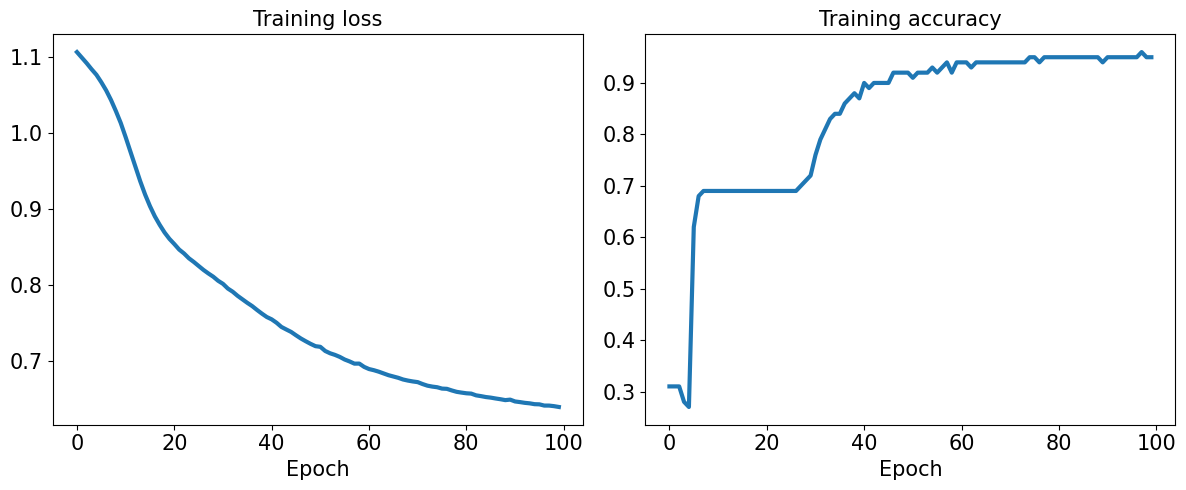

In [20]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

#plt.savefig('figures/12_09.pdf')
 
plt.show()

## Conjunto de Teste


Agora, vamos utilizar a rede neural aprendida para atribuir classes ao conjunto de teste.

In [21]:
# Normalizando os dados de teste e passando para tensores

X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()

y_test = torch.from_numpy(y_test).long()


In [23]:
pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'Acurácia no Conjunto de Teste: {accuracy:.4f}')

Acurácia no Conjunto de Teste: 0.9800


# Aplicação com Classificação de Imagens 

Esta aplicação é parte do tutorial oficial do PyTorch. Pode ser encontrada em:
- https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html



### Conjunto de dados

O conjunto de dados que utilizaremos nessa aplicação, conhecido como FashionMNIST, está disponível na biblioteca torchvision. 

Ele inclui um conjunto de imagens de moda e é comumente usado para treinar e testar modelos de aprendizado de máquina.

As imagens incluem as seguintes classes:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

In [24]:
from torchvision import datasets # Utilizado para realizar o download do dataset
from torchvision.transforms import ToTensor # Utilizado para passar os dados de imagens para o formato de tensor 

In [25]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)


test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

Vamos passar o conjunto de dados para o tradicional **DataLoader** do PyTorch.

In [26]:
batch_size = 64 # Tamanho do lote utilizado no mini-batch SGD

# Conjunto de treinamento
train_dataloader = DataLoader(training_data, batch_size = batch_size)

# Conjunto de teste
test_dataloader = DataLoader(test_data, batch_size = batch_size)


Podemos examinar o shape de um lote

In [27]:
# Shape dos dados

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


O PyTorch faz grande uso de GPUs, se disponíveis. 

Existem vários paradigmas baseados no uso de GPUs. Tradicionalmente, utiliza-se recursos para realizar operações algébricas em paralelo.

In [28]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


### Criando o modelo

Vamos utilizar uma rede neural com duas camadas escondidas e uso da função de ativação Relu.

Esse processo pode ser automatizado com o método nn.Sequential()

In [29]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.flatten = nn.Flatten() # Cada imagem está inicialmente na dimensão 28X28. Este método resolve isso passando para uma dimensão com 784 entradas.
        
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), # A primeira camada tem input com dimensão 784 e output 512 (número de unidades da camada)
            nn.ReLU(),
            nn.Linear(512, 512), # A segunda camada também possui  512 unidades
            nn.ReLU(),
            nn.Linear(512, 10) # A camada de saída possui 10 unidades, cada unidade corresponde à uma classe.
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [30]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [31]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [32]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [33]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.312396  [   64/60000]
loss: 2.292527  [ 6464/60000]
loss: 2.272382  [12864/60000]
loss: 2.264944  [19264/60000]
loss: 2.243447  [25664/60000]
loss: 2.223664  [32064/60000]
loss: 2.225321  [38464/60000]
loss: 2.196141  [44864/60000]
loss: 2.190355  [51264/60000]
loss: 2.154518  [57664/60000]
Test Error: 
 Accuracy: 57.2%, Avg loss: 2.152896 

Epoch 2
-------------------------------
loss: 2.166333  [   64/60000]
loss: 2.149893  [ 6464/60000]
loss: 2.091474  [12864/60000]
loss: 2.111259  [19264/60000]
loss: 2.052930  [25664/60000]
loss: 1.995906  [32064/60000]
loss: 2.024242  [38464/60000]
loss: 1.942767  [44864/60000]
loss: 1.942836  [51264/60000]
loss: 1.866895  [57664/60000]
Test Error: 
 Accuracy: 59.2%, Avg loss: 1.867585 

Epoch 3
-------------------------------
loss: 1.902571  [   64/60000]
loss: 1.864801  [ 6464/60000]
loss: 1.745118  [12864/60000]
loss: 1.799016  [19264/60000]
loss: 1.676172  [25664/60000]
loss: 1.629359  [32064/600

É possível salvar a Rede Neural treinada no computador para uso posterior!  

In [34]:
torch.save(model.state_dict(), "model.pth")
print("O modelo foi salvo como: model.pth")

O modelo foi salvo como: model.pth


Uma vez salvo, pode-se realizar o upload do modelo.

In [35]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [36]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]

with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


In [37]:
pred[0]

tensor([-2.4086, -2.4969, -1.1386, -1.8694, -1.0100,  2.4743, -1.1285,  2.6273,
         1.7740,  3.1261])